In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
% pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('features.csv')
df.head(2)

,Unnamed: 0,Month,DayofMonth,DayOfWeek,AirlineID,FlightNum,DepDel15,TaxiIn,AirTime,ArrDel15
0,0,4,22,6,19930,634,0.0,9.0,124.0,0.0
1,1,4,6,4,19805,323,0.0,12.0,78.0,0.0


In [12]:
#del df['Unnamed: 0']
del df['AirlineID']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63779 entries, 0 to 63778
Data columns (total 8 columns):
Month         63779 non-null int64
DayofMonth    63779 non-null int64
DayOfWeek     63779 non-null int64
FlightNum     63779 non-null int64
DepDel15      63779 non-null float64
TaxiIn        63779 non-null float64
AirTime       63779 non-null float64
ArrDel15      63779 non-null float64
dtypes: float64(4), int64(4)
memory usage: 3.9 MB


In [13]:
x = df.iloc[:, :6]
y = df.iloc[:, 7]
x.head()

,Month,DayofMonth,DayOfWeek,FlightNum,DepDel15,TaxiIn
0,4,22,6,634,0.0,9.0
1,4,6,4,323,0.0,12.0
2,4,9,7,5923,1.0,11.0
3,4,21,5,1645,0.0,6.0
4,4,24,1,4285,0.0,10.0


In [14]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = x).fit()
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDel15   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        03:01:55   Log-Likelihood:                -3402.5
No. Observations:               63779   AIC:                             6817.
Df Residuals:                   63773   BIC:                             6871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month         -0.0014      0.000     -5.179      0.000      -0.002      -0.001
DayofMonth    -0.0001      0.000     -1.216      0.224      -0.000    7.63e-05
DayOfWeek     -0.0007      0.000     -1.518      0.129      -0.002       0.000
FlightNum   1.819e-06   5.38e-07      3.381      0.001    7.65e-07    2.87e-06
DepDel15       0.7453      0.003    285.077      0.000       0.740       0.750
TaxiIn         0.0075      0.000     45.938      0.000       0.007       0.008
==============================================================================
Omnibus:                    14929.561   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147015.246
Skew:                           0.846   Prob(JB):                         0.00
Kurtosis:                      10.243   Cond. No.                     7.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

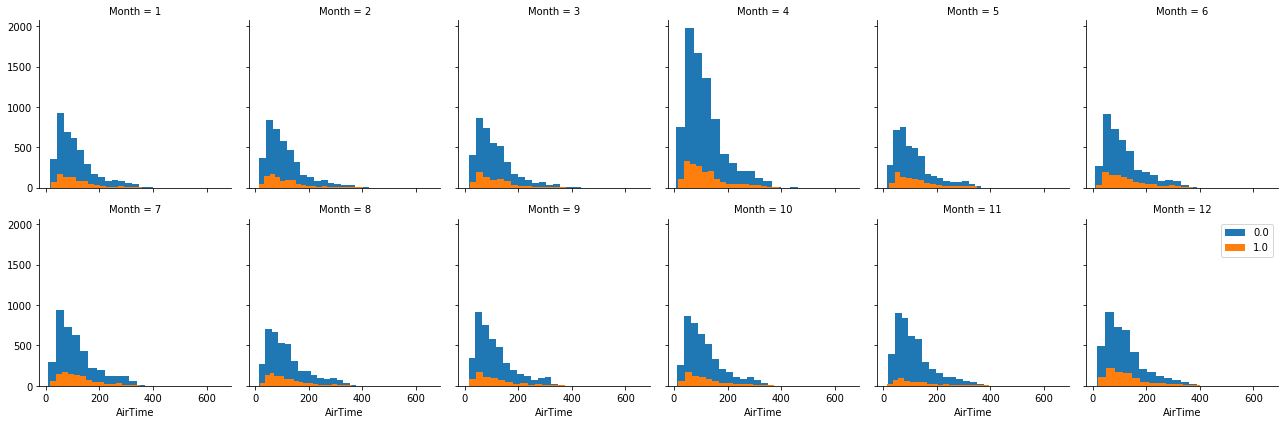

In [19]:
g = sns.FacetGrid(df, col = "Month", hue ="ArrDel15", col_wrap=6)
g = g.map(plt.hist, "AirTime", bins =20)
plt.legend()

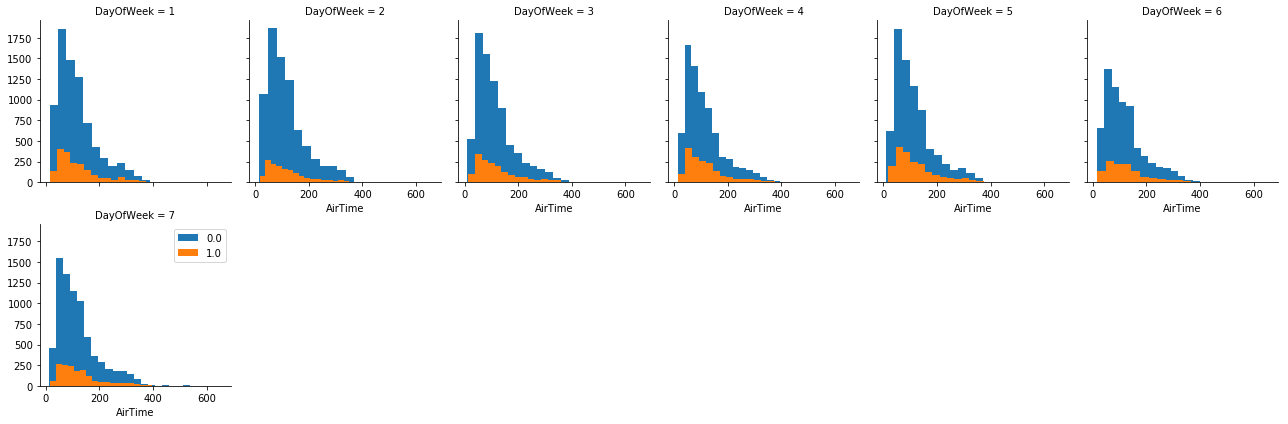

In [23]:
g = sns.FacetGrid(df, col = "DayOfWeek", hue ="ArrDel15", col_wrap=6)
g = g.map(plt.hist, "AirTime", bins =20)
plt.legend()

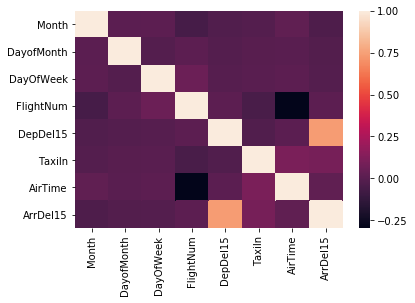

In [15]:
import seaborn as sns 
cor = df.corr()
sns.heatmap(cor)

In [24]:
## defining features and processing features 
from sklearn.model_selection import learning_curve, validation_curve, train_test_split 
from sklearn.preprocessing import StandardScaler 

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.3)

In [25]:
## model comparison 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier   


In [26]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Extra Tree', ExtraTreesClassifier())) 
models.append(('Decision Tree ', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

In [27]:
lg = LogisticRegression()
et = ExtraTreesClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [28]:
names = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'AirlineID', 'TaxiOut', 'TaxiIn', 'WheelsOff', 'WheelsOn', 'DistanceGroup', 'AirTime', 'DepDel15', 'ArrDel15'] 
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=15, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (names, cv_results.mean(), cv_results.std())
print(msg)

['Logistic Regression', 'Extra Tree', 'Decision Tree ', 'Random Forest']: 0.909578 (0.008144)


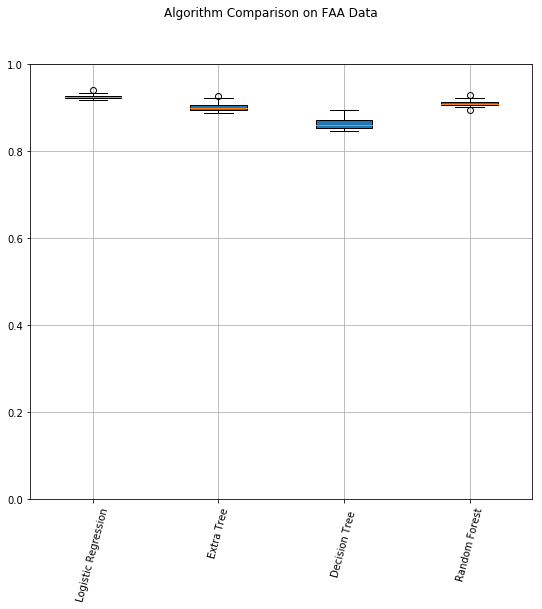

In [32]:
fig = plt.figure(figsize= (9, 8))
fig.suptitle('Algorithm Comparison on FAA Data ')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist=True)
plt.grid(True)
plt.ylim(0,1,.05)
ax.set_xticklabels(names, rotation= 75)
plt.show() 

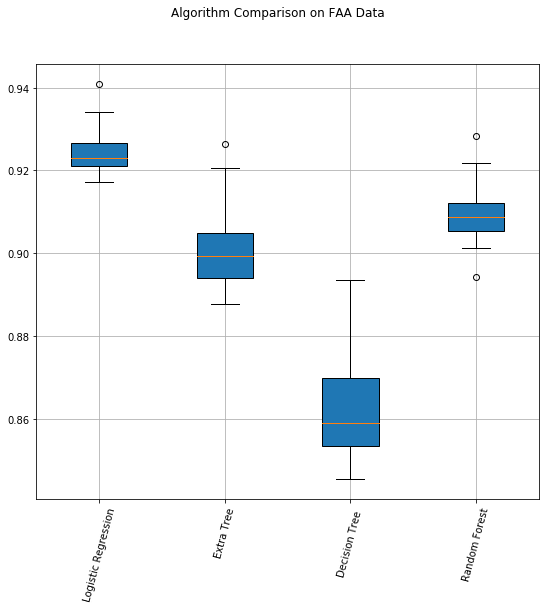

In [33]:
fig = plt.figure(figsize= (9, 8))
fig.suptitle('Algorithm Comparison on FAA Data ')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist=True)
plt.grid(True)

ax.set_xticklabels(names, rotation= 75)
plt.show() 

<Figure size 432x288 with 0 Axes>

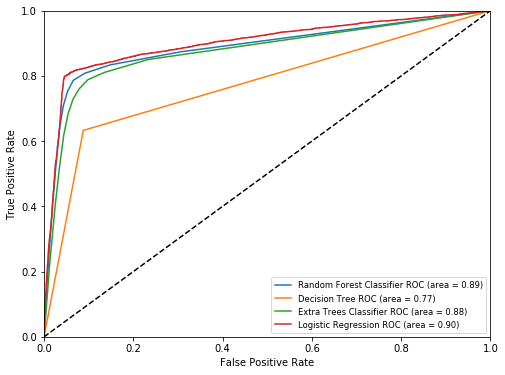

In [34]:
from sklearn.metrics import roc_curve
from sklearn import metrics

#Visualising ROC Curves of different models
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = train_test_split(x, y,test_size=0.3)
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = train_test_split(x,y,test_size=0.3)

models = [
    {
        'label' : 'Random Forest Classifier',
        'model': rf,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },     
    {
        'label' : 'Decision Tree',
        'model': dt,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },
    {
        'label' : 'Extra Trees Classifier',
        'model': et,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },        
     {
        'label' : 'Logistic Regression',
        'model': lg,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    }        
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds =metrics.roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc=metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [37]:
## detect for overfitting and underfitting with learning curve visualization 
from sklearn.model_selection import learning_curve

In [38]:
## standardizing values for better model visualization 
ss = StandardScaler()
s = ss.fit(x, y)
X = s.transform(x)

In [39]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizesl, train_scoresl, valid_scoresl = learning_curve(
 lg, X, y, train_sizes=[50, 80, 110], cv=cv)

In [40]:
train_scores_mean = np.mean(train_scoresl, axis=1)
train_scores_std = np.std(train_scoresl, axis=1)
test_scores_mean = np.mean(valid_scoresl, axis=1)
test_scores_std = np.std(valid_scoresl, axis=1)

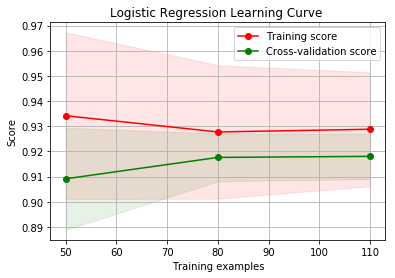

In [41]:
plt.figure()
plt.title('Logistic Regression Learning Curve ')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizesl, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizesl, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizesl, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizesl, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best") 

In [42]:
train_sizesr, train_scoresr, valid_scoresr = learning_curve(
 dt, X, y, train_sizes=[50, 80, 110], cv=cv)

In [43]:
train_scores_mean = np.mean(train_scoresr, axis=1)
train_scores_std = np.std(train_scoresr, axis=1)
test_scores_mean = np.mean(valid_scoresr, axis=1)
test_scores_std = np.std(valid_scoresr, axis=1)

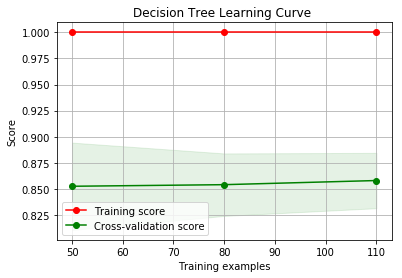

In [44]:
plt.figure()
plt.title('Decision Tree Learning Curve ')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizesr, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizesr, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizesr, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizesr, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best") 

In [45]:
train_sizese, train_scorese, valid_scorese = learning_curve(
 et, X, y, train_sizes=[50, 80, 110], cv=cv)

In [46]:
train_scores_mean = np.mean(train_scorese, axis=1)
train_scores_std = np.std(train_scorese, axis=1)
test_scores_mean = np.mean(valid_scorese, axis=1)
test_scores_std = np.std(valid_scorese, axis=1)

train_scores_mean = np.mean(train_scoresl, axis=1)
train_scores_std = np.std(train_scoresl, axis=1)
test_scores_mean = np.mean(valid_scoresl, axis=1)
test_scores_std = np.std(valid_scoresl, axis=1)

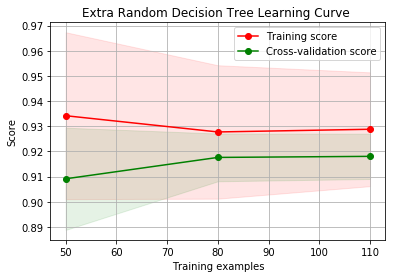

In [47]:



plt.figure()
plt.title('Extra Random Decision Tree Learning Curve ')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizese, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizese, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizese, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizese, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best") 

In [48]:
train_sizese, train_scorese, valid_scorese = learning_curve(
 et, X, y, train_sizes=[50, 80, 110], cv=cv)

train_scores_meane = np.mean(train_scorese, axis=1)
train_scores_stde = np.std(train_scorese, axis=1)
test_scores_meane = np.mean(valid_scorese, axis=1)
test_scores_stde = np.std(valid_scorese, axis=1) 



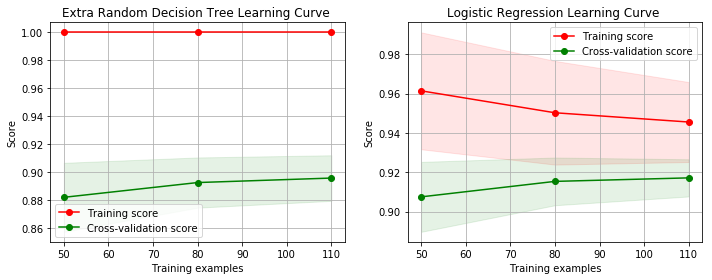

In [18]:
fig = plt.figure(figsize = (10, 4))

plt.subplot(1, 2,1)
plt.title('Extra Random Decision Tree Learning Curve ')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizese, train_scores_meane - train_scores_stde,
                     train_scores_meane + train_scores_stde, alpha=0.1,
                     color="r")
plt.fill_between(train_sizese, test_scores_meane - test_scores_stde,
                     test_scores_meane + test_scores_stde, alpha=0.1, color="g")
plt.plot(train_sizese, train_scores_meane, 'o-', color="r",
             label="Training score")
plt.plot(train_sizese, test_scores_meane, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best") 

plt.subplot(1, 2, 2)
plt.title('Logistic Regression Learning Curve ')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizesl, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizesl, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizesl, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizesl, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best") 
plt.tight_layout()